# 선형 모델(Linear Models)

* 선형 모델은 과거 부터 지금 까지 널리 사용되고 연구 되고 있는 기계학습 방법
* 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행

* 회귀 분석을 위한 선형 모델은 다음과 같이 정의

\begin{equation}
\hat{y}(w,x) = w_0 + w_1 x_1 + ... + w_p x_p
\end{equation}

  + $x$: 입력 데이터
  + $w$: 모델이 학습할 파라미터
  + $w_0$: 편향
  + $w_1$~$w_p$: 가중치


## 선형 회귀(Linear Regression)

* **선형 회귀(Linear Regression)**또는 **최소제곱법(Ordinary Least Squares)**은 가장 간단한 회귀 분석을 위한 선형 모델
* 선형 회귀는 모델의 예측과 정답 사이의 **평균제곱오차(Mean Squared Error)**를 최소화 하는 학습 파라미터 $w$를 찾음
* 평균제곱오차는 아래와 같이 정의

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\end{equation}

  + $y$: 정답
  + $\hat{y}$: 예측 값을 의미

* 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
  + MAE(Mean Absoulte Error)
  + MAPE(Mean Absolute Percentage Error)
  + MSE(Mean Squared Error)
  + MPE(Mean Percentage Error)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

<ipython-input-2-d9c6b032ef11>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


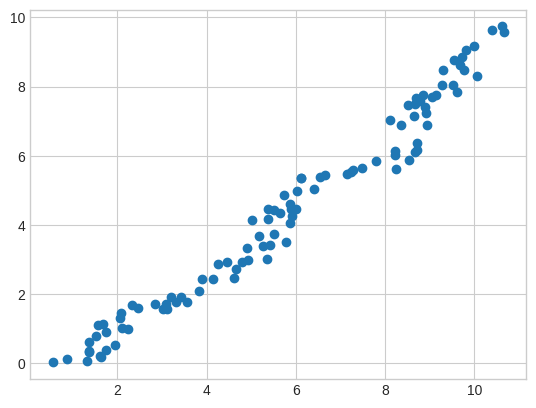

In [ ]:
noise = np.random.rand(100,1) # 노이즈 삽입
X = sorted(10 * np.random.rand(100, 1)) + noise # 선형이니 정렬 sorted
y = sorted(10 * np.random.rand(100))

plt.scatter(X, y);

In [ ]:
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size = 0.1) # 10% test
model = LinearRegression() #모델
model.fit(X_train, y_train) # 모델 fit

LinearRegression()

In [ ]:
print('선형 회귀 가중치 : {}'.format(model.coef_))
print('선형 회귀 편향 : {}'.format(model.intercept_))

선형 회귀 가중치 : [0.94678417]
선형 회귀 편향 : -1.0665008693704685


In [ ]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.970065082638767
평가 데이터 점수 : 0.9661149658097922


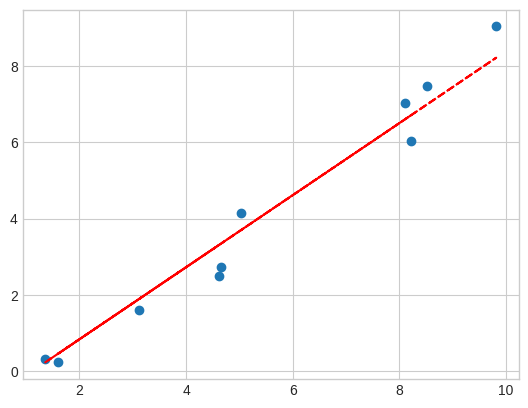

In [ ]:
predict = model.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, predict, '--r');

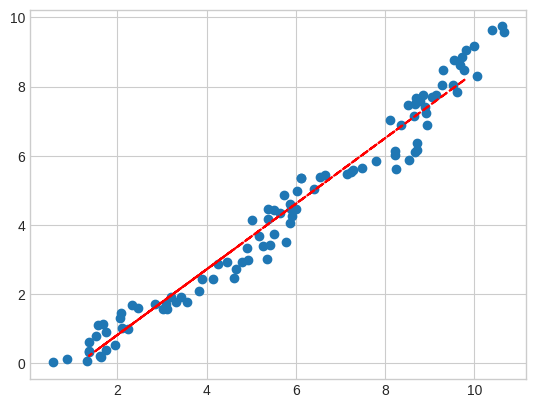

In [ ]:
predict = model.predict(X_test)

plt.scatter(X, y)
plt.plot(X_test, predict, '--r');

### 캘리포니아 주택 가격 데이터

| 속성 | 설명 |
|------|------|
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 평균 방수 |
| AveBedrms | 평균 침실수 |
| Population | 블록 내 거주중인 인구수 |
| AveOccup | 평균 주택점유율 |
| Latitude | 주택 블록 위도 |
| Longitude | 주택 블록 경도 |

In [1]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
print(california.keys())
print(california.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($10

In [2]:
import pandas as pd
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['Target'] = california.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


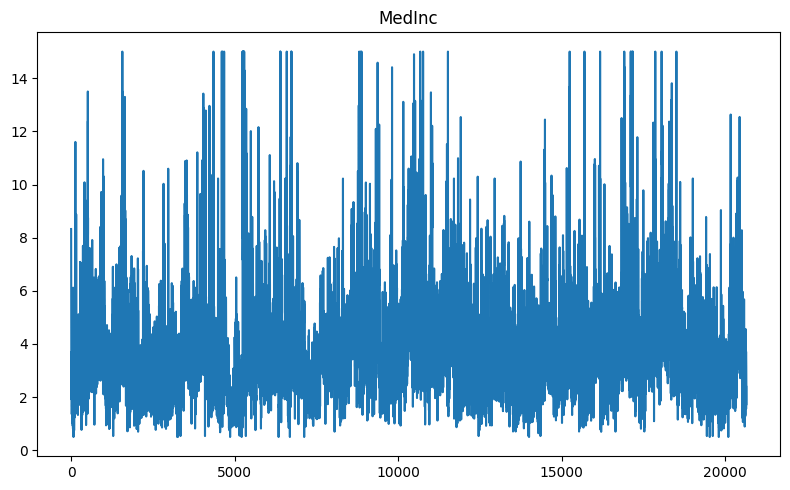

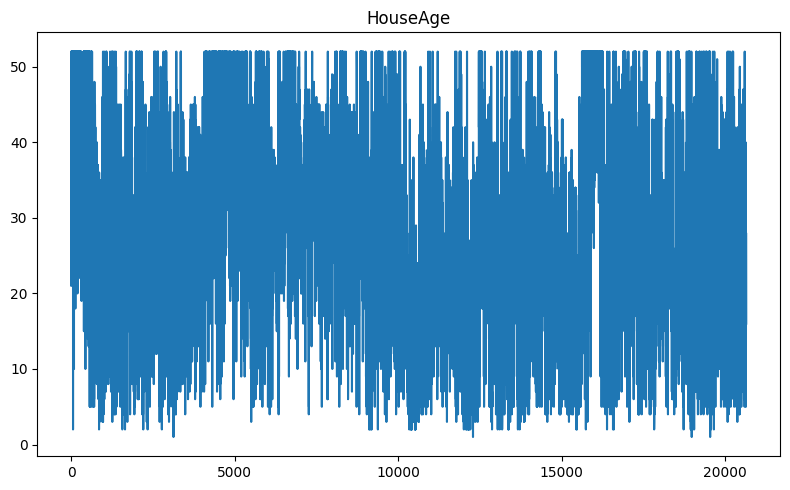

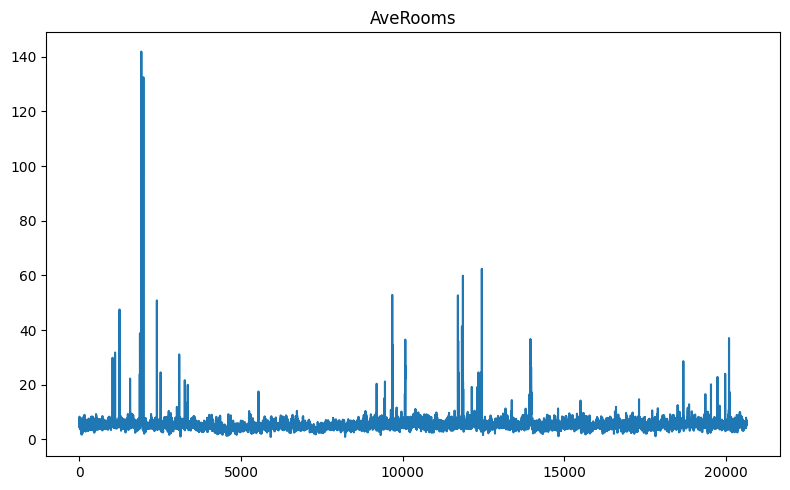

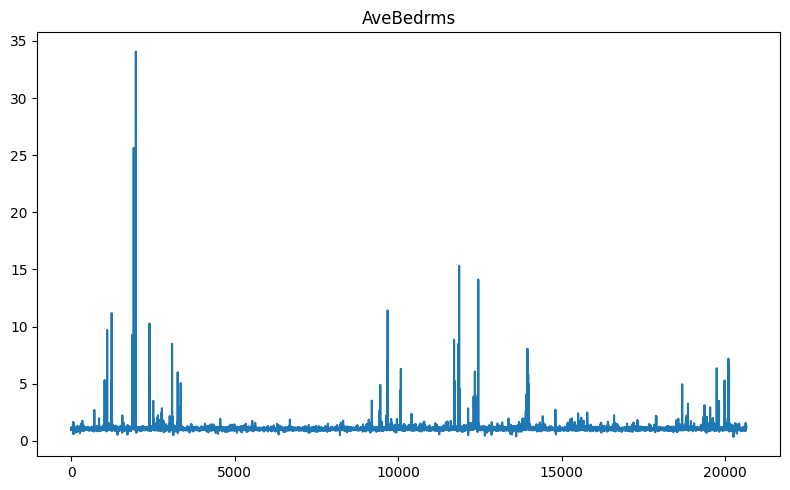

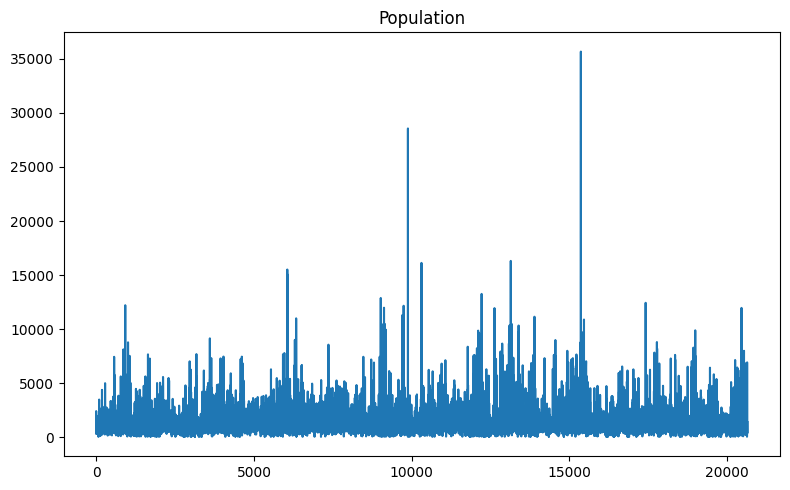

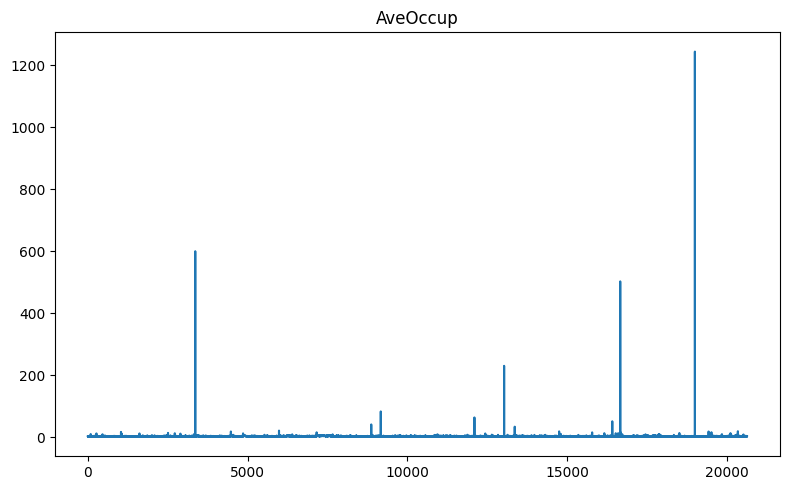

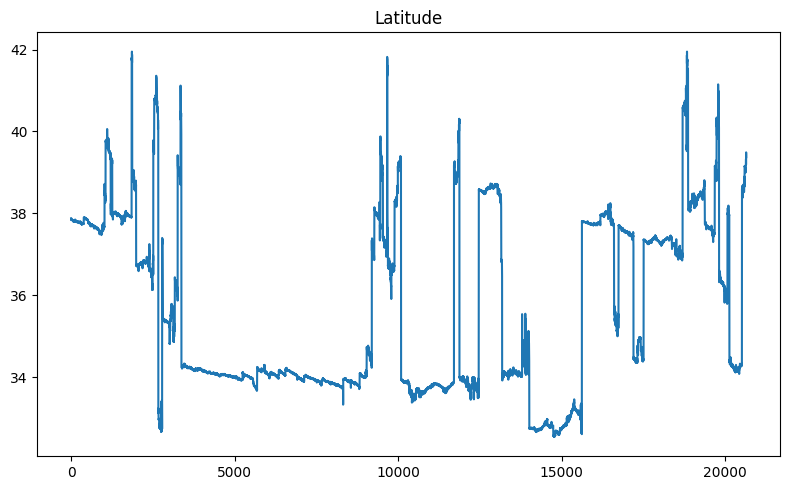

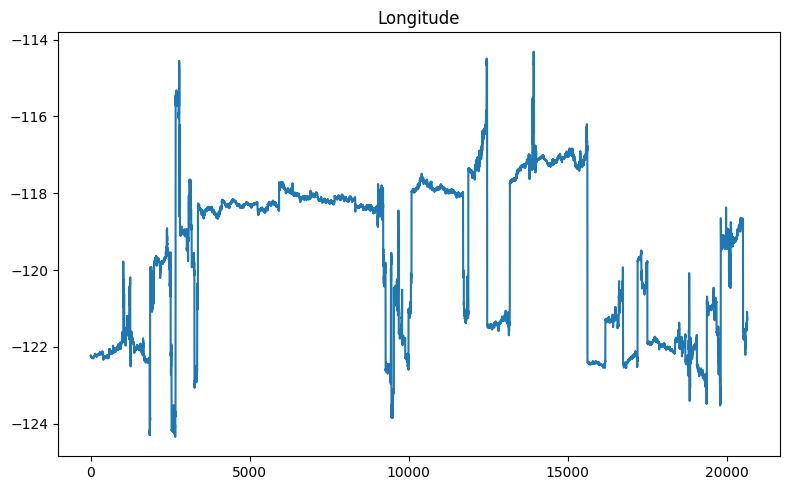

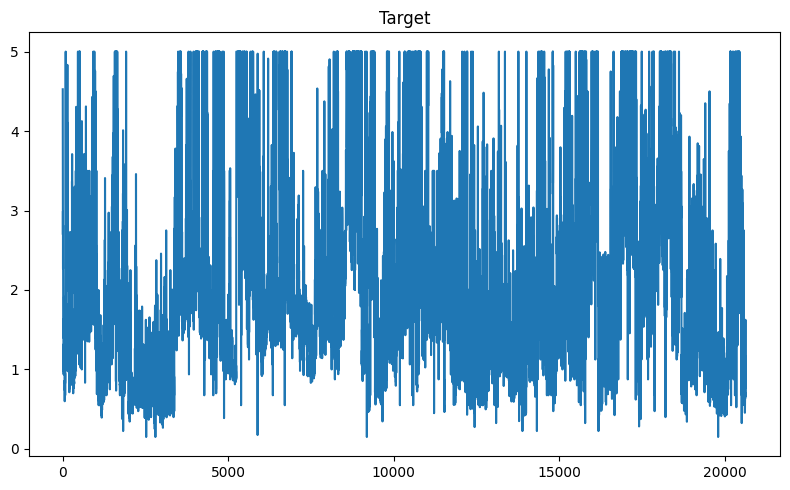

In [4]:
import matplotlib.pyplot as plt

for i ,col in enumerate(california_df.columns):
  plt.figure(figsize=(8,5))
  plt.plot(california_df[col])
  plt.title(col)
  plt.tight_layout()

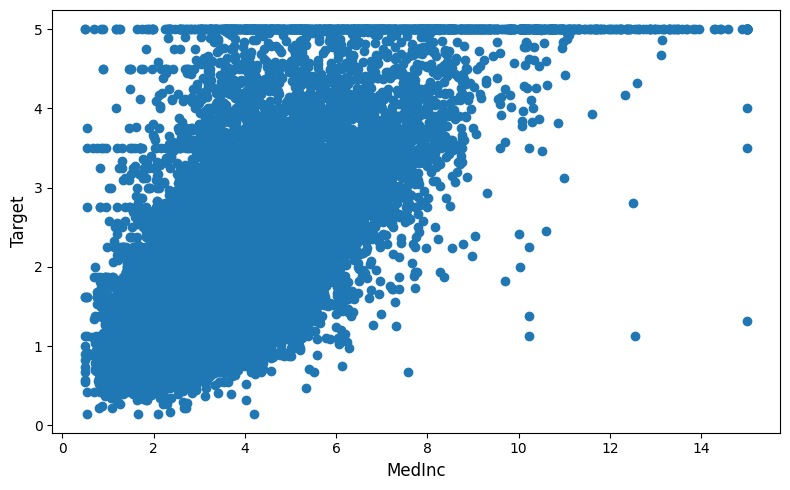

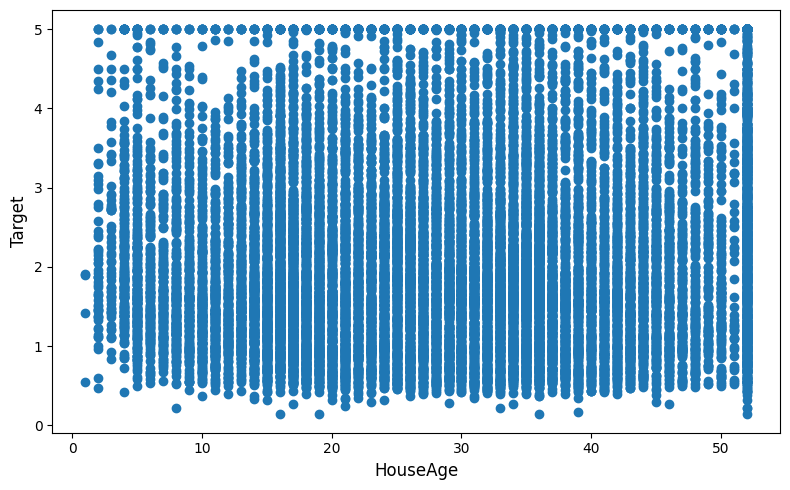

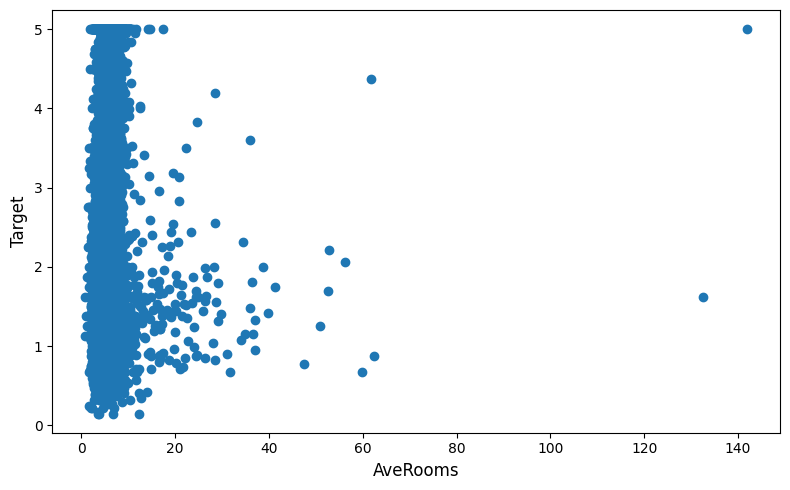

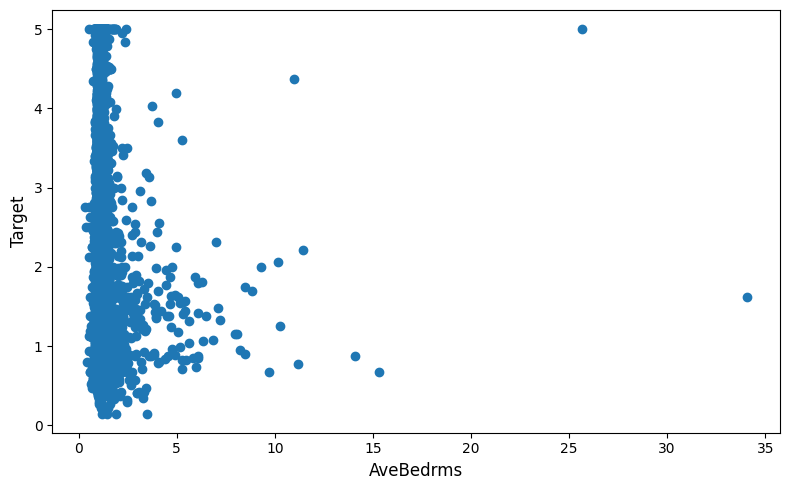

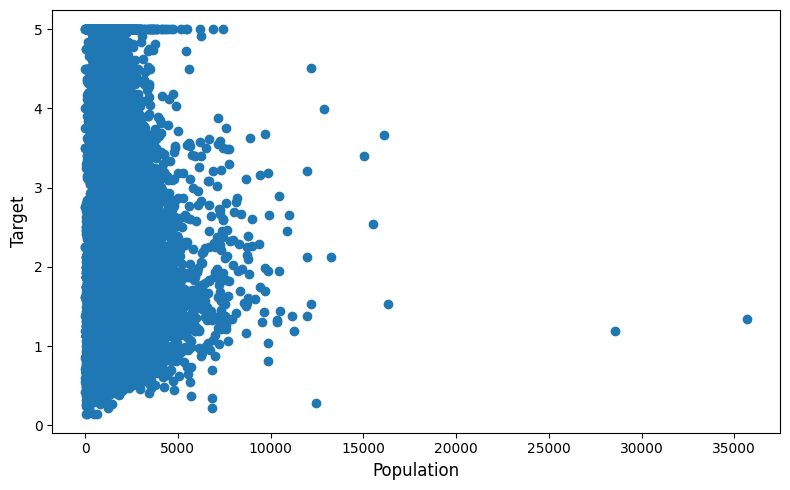

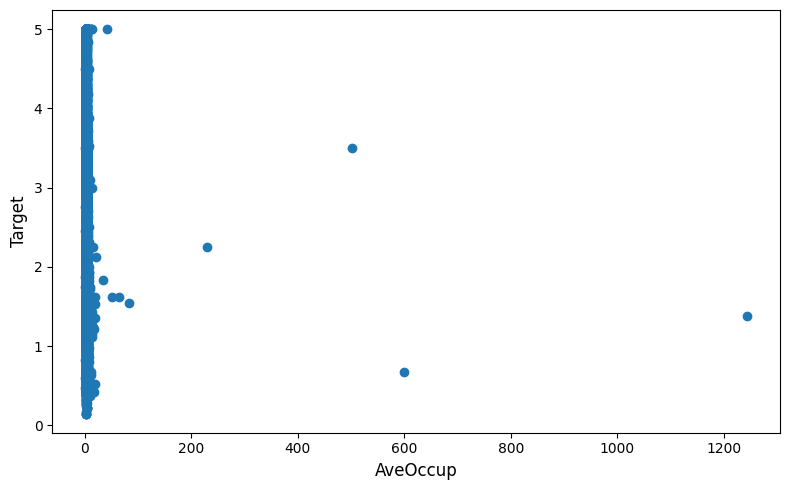

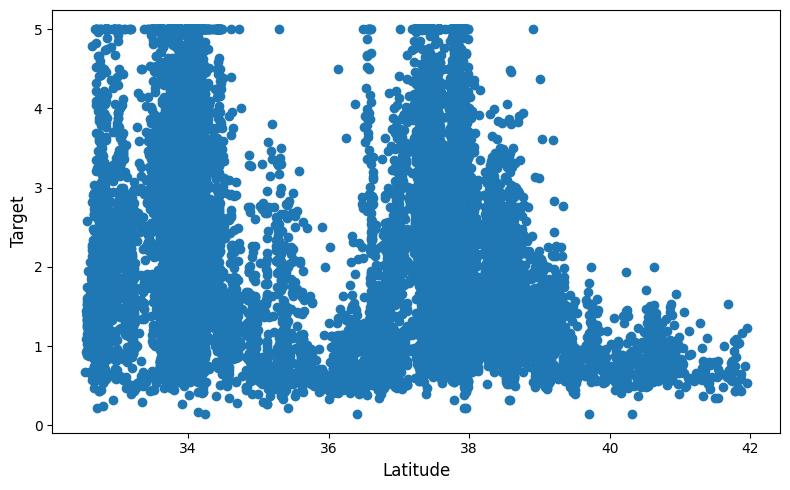

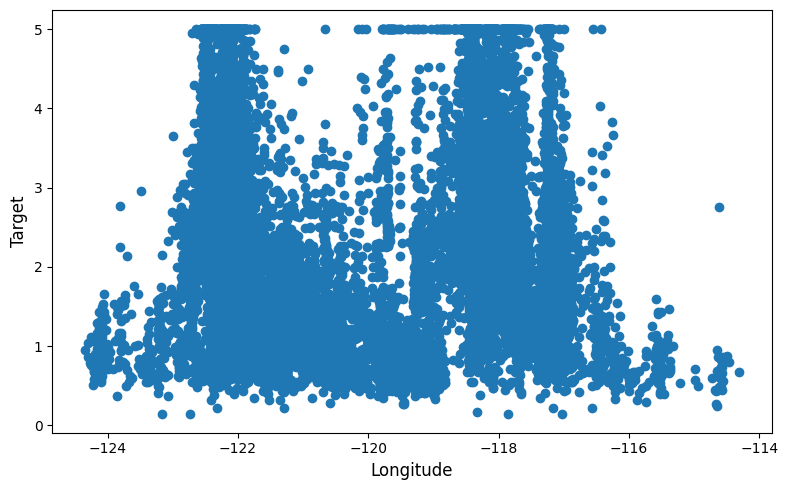

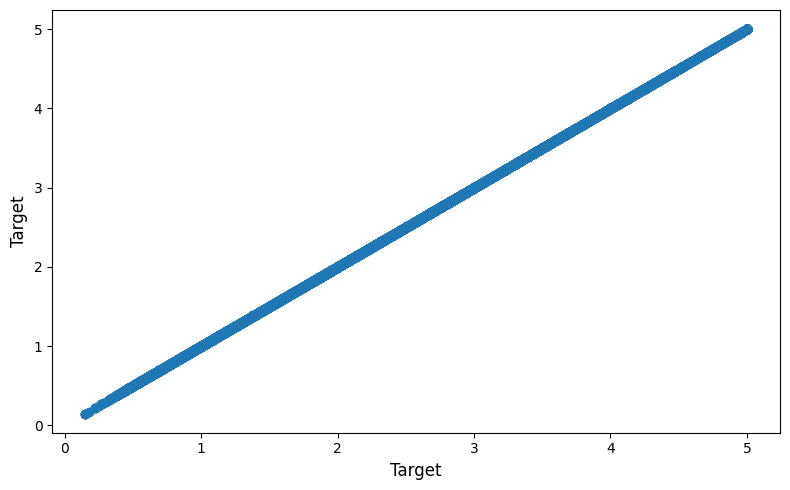

In [5]:
for i ,col in enumerate(california_df.columns):
  plt.figure(figsize=(8,5))
  plt.scatter(california_df[col], california_df['Target'])
  plt.ylabel('Target', size=12)
  plt.xlabel(col, size=12)
  plt.tight_layout()

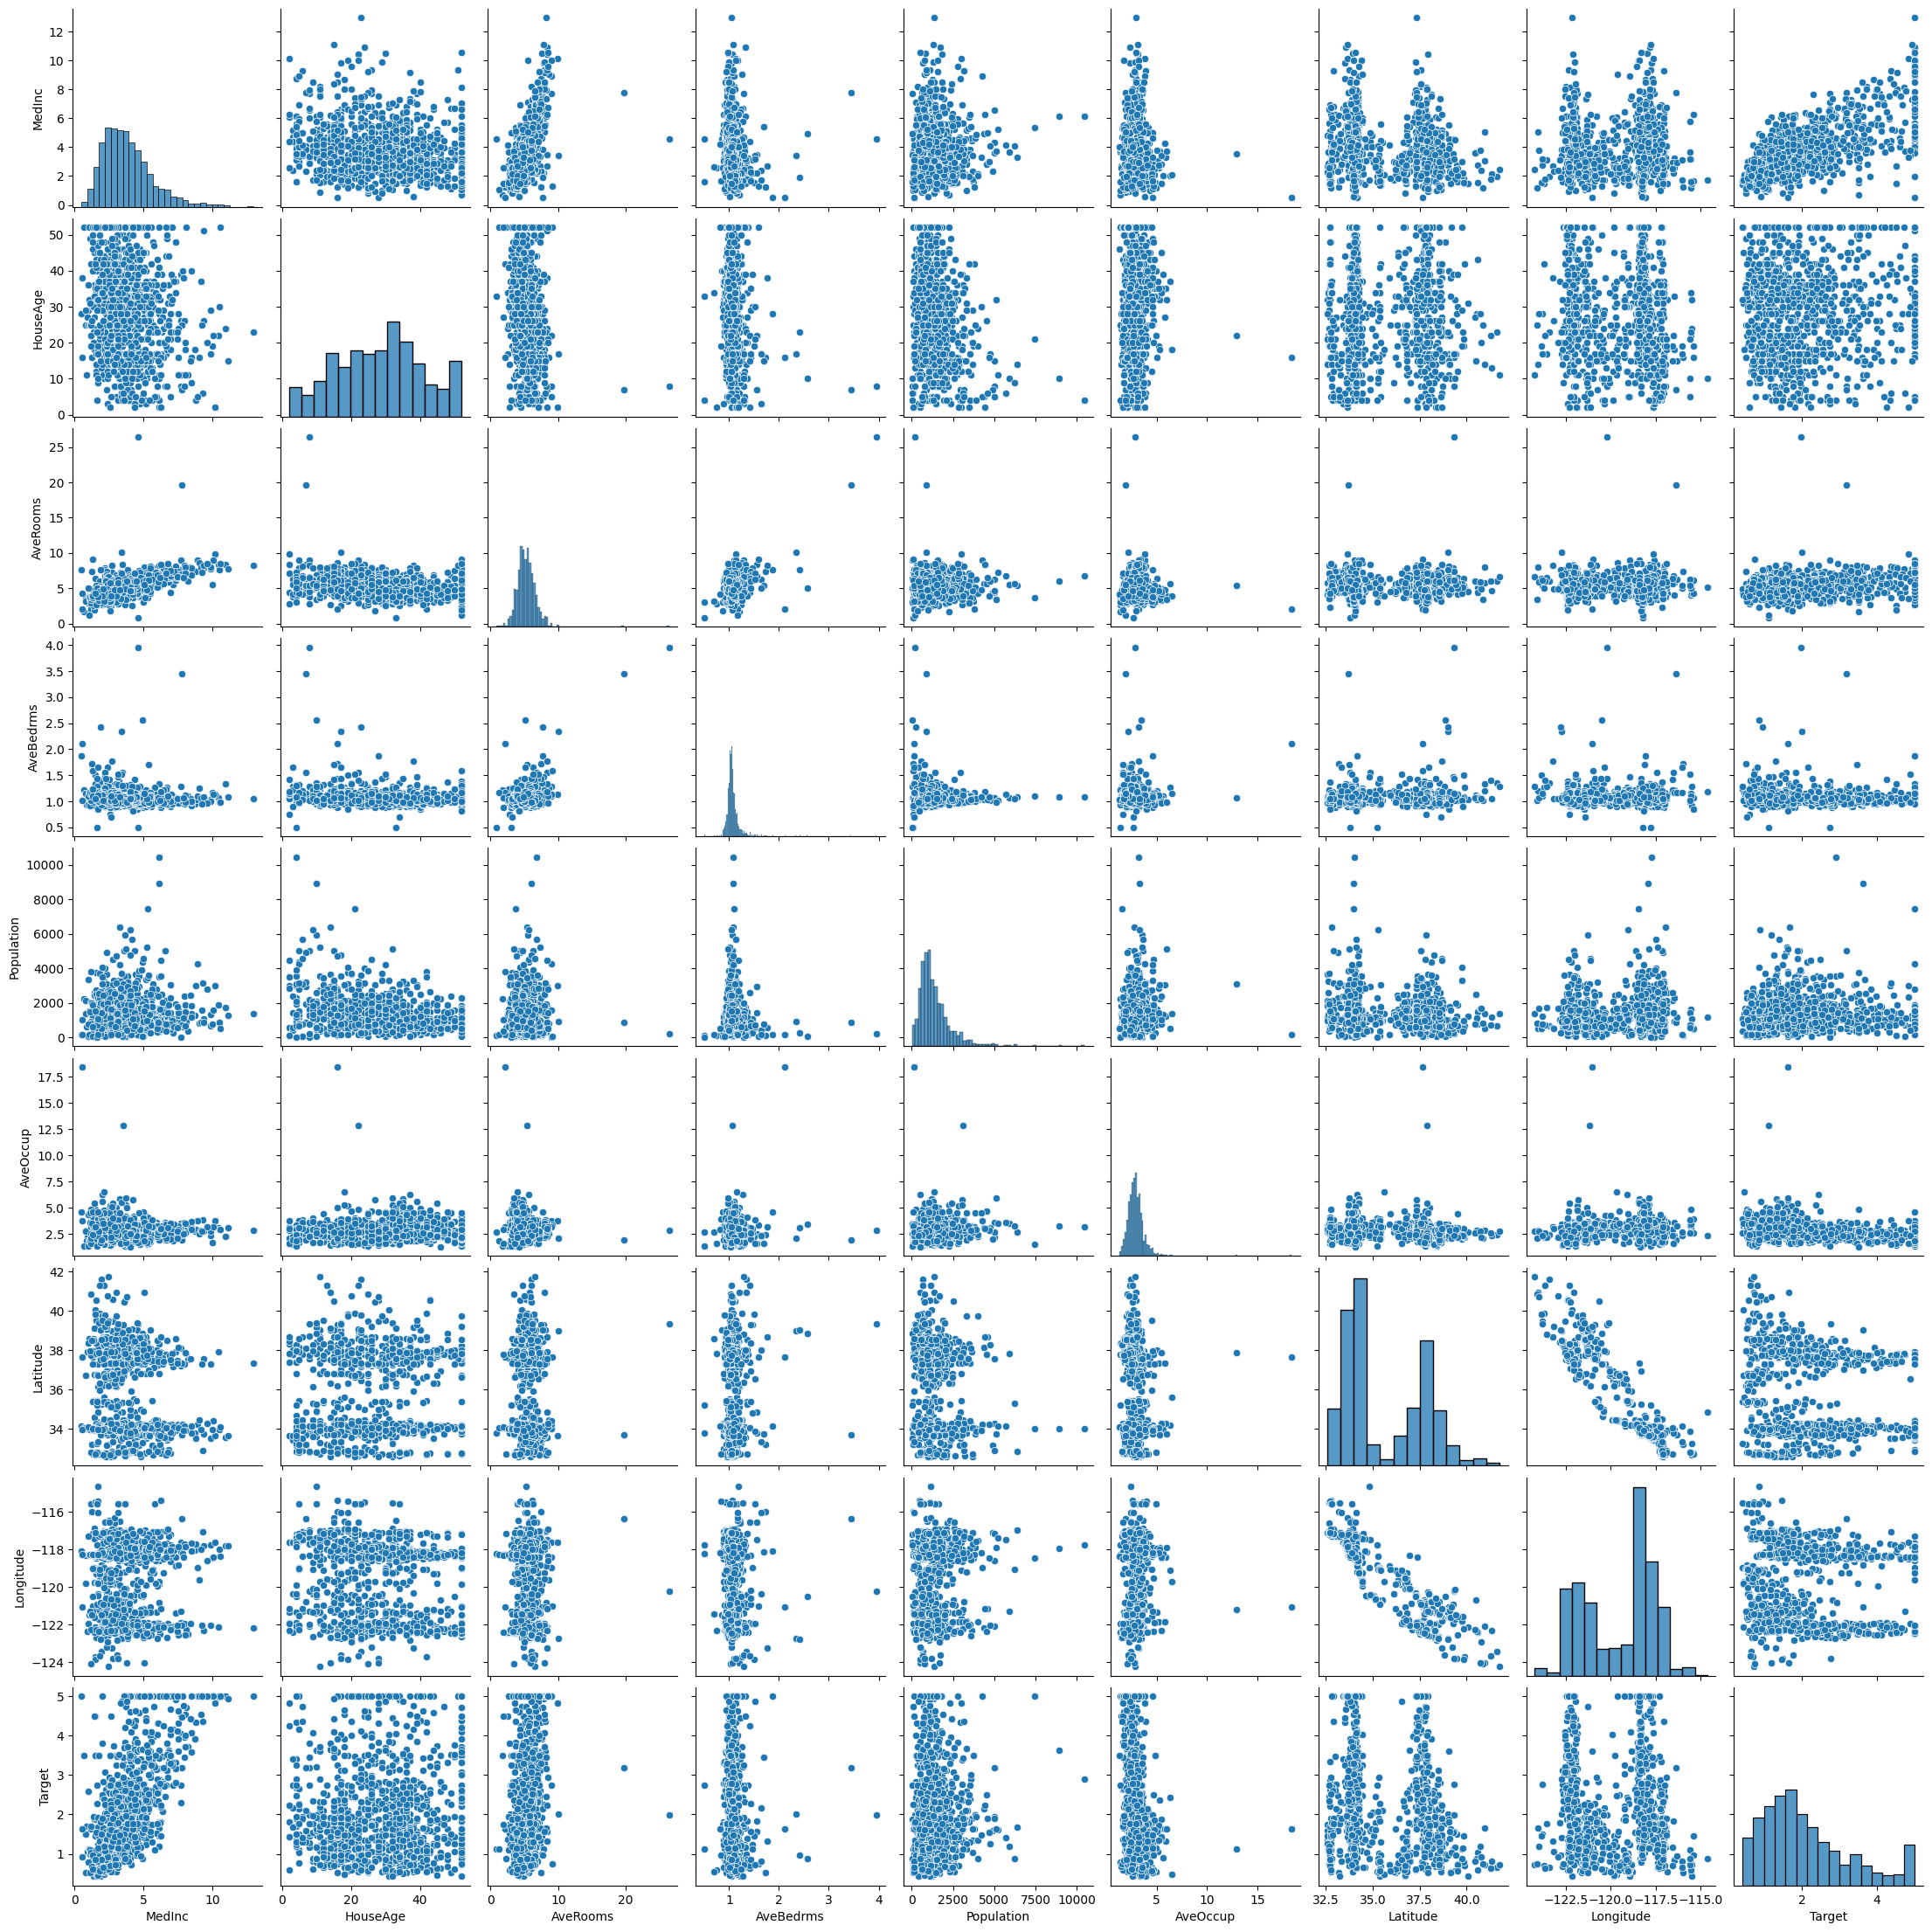

In [6]:
import seaborn as sns

sns.pairplot(california_df.sample(1000));


<Axes: xlabel='Longitude', ylabel='Latitude'>

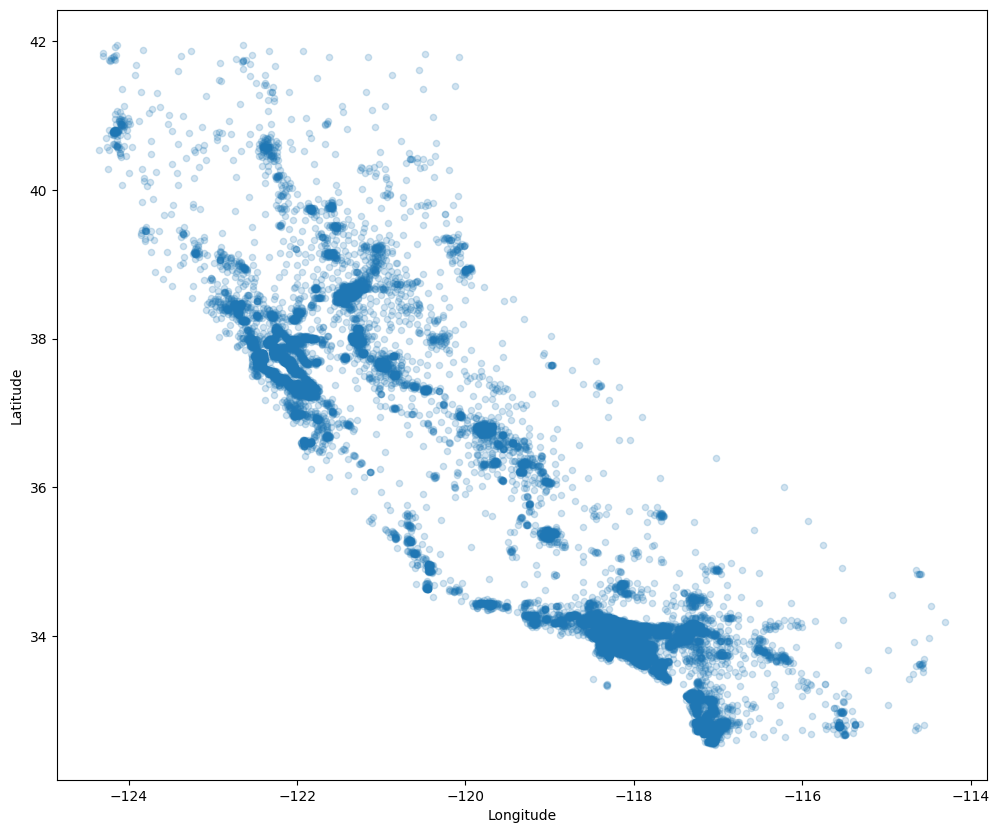

In [7]:
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, figsize=(12,10))

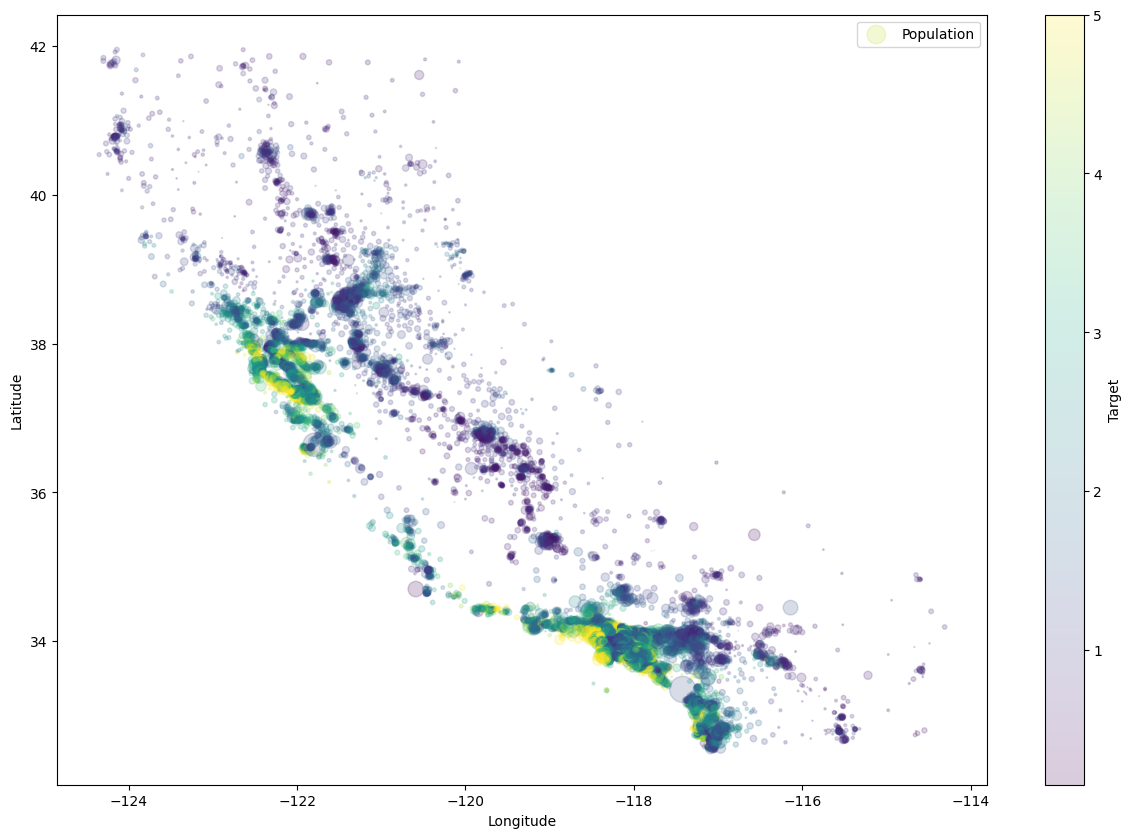

In [9]:
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2,
                   s=california_df['Population']/100, label='Population', figsize=(15,10),
                   c='Target', cmap=plt.get_cmap('viridis'),colorbar=True);

### 캘리포니아 주택 가격에 대한 선형 회귀

In [10]:
from sklearn.model_selection import cross_val_score

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

model.fit(X_train, y_train)
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

scores = cross_val_score(model, california.data, california.target, cv=10, scoring='neg_mean_squared_error')
print('NMSE mean: {}'.format(scores.mean()))
print('NMSE std: {}'.format(scores.std()))

r2_scores = cross_val_score(model, california.data, california.target, cv=10, scoring='r2')
print('R2 Score mean: {}'.format(r2_scores.mean()))

학습 데이터 점수 : 0.6049543250355532
평가 데이터 점수 : 0.610859523064736
NMSE mean: -0.550952429695663
NMSE std: 0.19288582953865002
R2 Score mean: 0.5110068610523775


In [16]:
print('y = ' + str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_):
  print(str(c) + '* x'+ str(i))

y = -37.32144532785519 
0.43373652597601814* x0
0.009591902974780001* x1
-0.09941949666578168* x2
0.5977813926223452* x3
-3.668654251070061e-06* x4
-0.0034577531796931888* x5
-0.42251437549766313* x6
-0.43817357236396876* x7


In [17]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [20]:
import numpy as np # Importing the NumPy library with the alias 'np'
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict))) # Now 'np' is defined and can be used
r2 = r2_score(y_train, y_train_predict)

print('RMSE: {}'.format(rmse))
print('R2 Score: {}'.format(r2))

RMSE: 0.7263597975256026
R2 Score: 0.6049543250355532


In [21]:
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print('RMSE: {}'.format(rmse))
print('R2 Score: {}'.format(r2))

RMSE: 0.7154569424502896
R2 Score: 0.610859523064736


In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

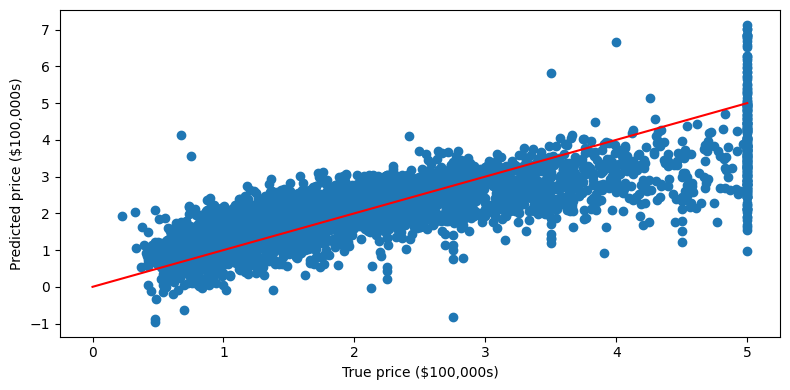

In [24]:
def plot_california_prices(expected, predicted):
    plt.figure(figsize=(8, 4))
    plt.scatter(expected, predicted)
    plt.plot([0, 5], [0, 5], color='red')  # y=x 선을 빨간색으로 추가
    plt.xlabel('True price ($100,000s)')
    plt.ylabel('Predicted price ($100,000s)')
    plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)


## 릿지 회귀(Ridge Regression)

* 릿지 회귀는 선형 회귀를 개선한 선형 모델
* 릿지 회귀는 선형 회귀와 비슷하지만, 가중치의 절대값을 최대한 작게 만든다는 것이 다름
* 이러한 방법은 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)를 거는 것
* 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
* 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생
* 릿지 회귀는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 사용자가 지정하는 매개변수
  * $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐

* 릿지 회귀는 가중치에 제약을 두기 때문에 선형 회귀 모델보다 훈련 데이터 점수가 낮을 수 있음
* 일반화 성능은 릿지 회귀가 더 높기 때문에 평가 데이터 점수는 릿지 회귀가 더 좋음

* 일반화 성능에 영향을 주는 매개 변수인 $\alpha$ 값을 조정해 보면서 릿지 회귀 분석의 성능이 어떻게 변하는지 확인 필요

### 캘리포니아 주택 가격에 대한 릿지 회귀

In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge
california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [26]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [27]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test,y_test)))

학습 데이터 점수 : 0.6089069753952787
평가 데이터 점수 : 0.5933829452674657


In [28]:
model = Ridge(alpha=0.2)
model.fit(X_train, y_train)

Ridge(alpha=0.2)

In [29]:
print('학습 데이터 점수 : {}',format(model.score(X_train,y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test,y_test)))

학습 데이터 점수 : {} 0.6089069735161061
평가 데이터 점수 : 0.5933877689072118


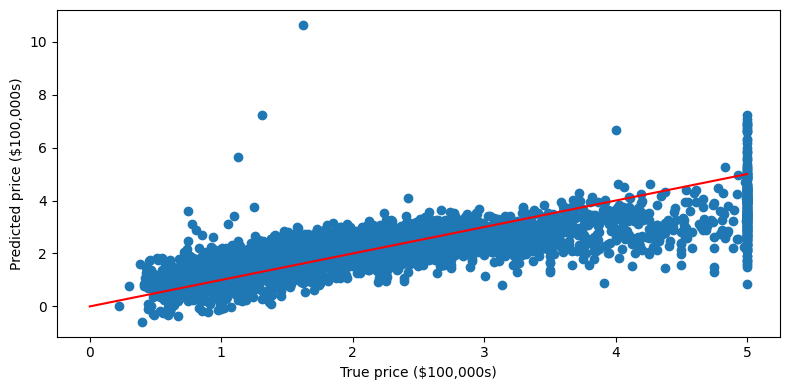

In [40]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 라쏘 회귀(Lasso Regression)

* 선형 회귀에 규제를 적용한 또 다른 모델로 라쏘 회귀가 있음
* 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용

* 라쏘 회귀에서는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation}

* 라쏘 회귀도 매개변수인 $\alpha$ 값을 통해 규제의 강도 조절 가능

### 캘리포니아 주택 가격에 대한 라쏘 회귀

In [41]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Lasso

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [42]:
model = Lasso(alpha=0.001)
model.fit(X_train, y_train)

Lasso(alpha=0.001)

In [43]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test,y_test)))

학습 데이터 점수 : 0.6067625017038998
평가 데이터 점수 : 0.6036086051775635


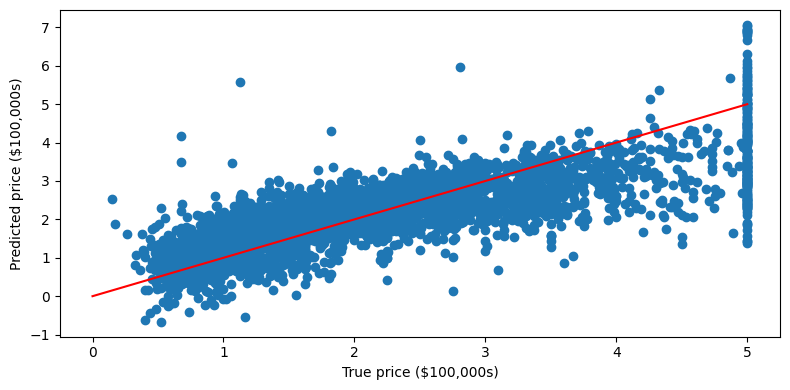

In [44]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 신축망 (Elastic-Net)

* 신축망은 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델
* 두 모델의 장점을 모두 갖고 있기 때문에 좋은 성능을 보임
* 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여 줌

* 신축망은 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 규제의 강도를 조절하는 매개변수
  + $\rho$: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수

### 캘리포니아 주택 가격에 대한 신축망

In [48]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import ElasticNet

california = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [56]:
model = ElasticNet(alpha =0.01, l1_ratio=0.5)
model.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [57]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))


학습 데이터 점수 : 0.6025878487585238
평가 데이터 점수 : 0.6095508358937903


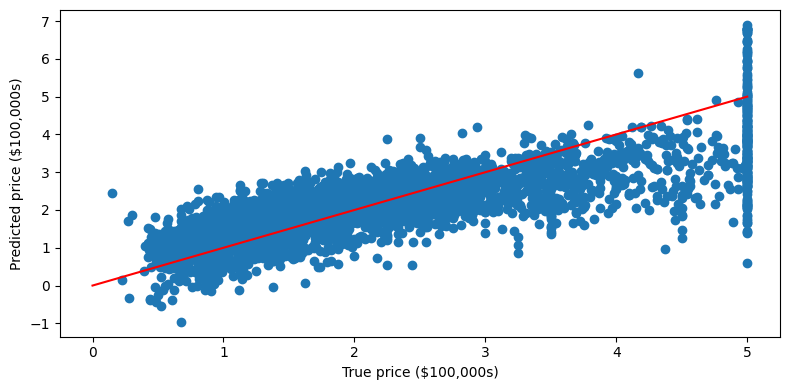

In [58]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

직교 정합 추구 (Orthogonal Matching Pursuit)
직교 정합 추구 방법은 모델에 존재하는 가중치 벡터에 특별한 제약을 거는 방법

직교 정합 추구 방법은 다음을 만족하는 파라미터  w 를 찾는것이 목표

argminw||y−y^||22subjectto||w||0≤k

||w||0 : 가중치 벡터  w 에서 0이 아닌 값의 개수
직교 정합 추구 방법은 가중치 벡터  w 에서 0이 아닌 값이  k 개 이하가 되도록 훈련됨
이러한 방법은 모델이 필요 없는 데이터 특성을 훈련 과정에서 자동으로 제거 하도록 만들 수 있음



In [61]:
# Import the necessary class from sklearn.linear_model
from sklearn.linear_model import OrthogonalMatchingPursuit

# Now you can create an instance of OrthogonalMatchingPursuit
model = OrthogonalMatchingPursuit(n_nonzero_coefs=5)
model.fit(X_train, y_train)

OrthogonalMatchingPursuit(n_nonzero_coefs=5)

In [62]:
print("학습 데이터 점수 :{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 :0.5183265914449231
평가 데이터 점수 : 0.5226547695259194


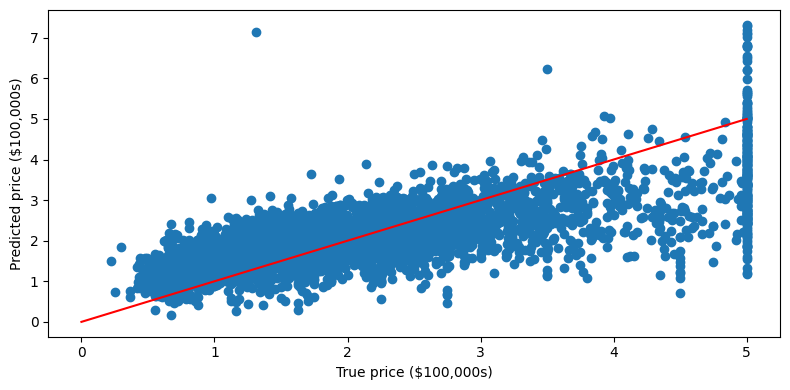

In [63]:
predicted = model.predict(X_test)
expected = y_test
plot_california_prices(expected, predicted)

In [64]:
model = OrthogonalMatchingPursuit(tol=1.)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:186: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  return func(*args, **kwargs)


OrthogonalMatchingPursuit(tol=1.0)

In [65]:
print("학습 데이터 점수 :{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 :{}".format(model.score(X_test, y_test)))

학습 데이터 점수 :0.6074347074894437
평가 데이터 점수 :0.6009348764826277


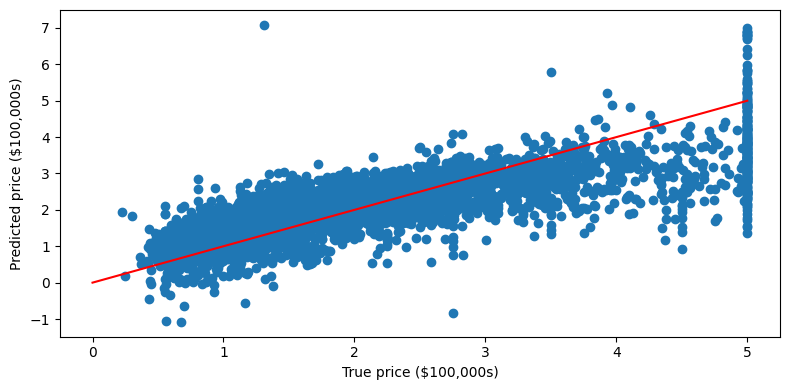

In [66]:
predicted = model.predict(X_test)
expected = y_test
plot_california_prices(expected, predicted)

## 다항 회귀 (Polynomial Regression)

* 입력 데이터를 비선형 변환 후 사용하는 방법
* 모델 자체는 선형 모델

\begin{equation}
\hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_1^2 + w_5 x_2^2
\end{equation}

* 차수가 높아질수록 더 복잡한 데이터 학습 가능

![polynomial regression](https://scikit-learn.org/stable/_images/sphx_glr_plot_polynomial_interpolation_0011.png)


### 캘리포니아 주택 가격에 대한 다항 회귀

In [68]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [71]:
from sklearn.pipeline import make_pipeline # Import the necessary library
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

model = make_pipeline( # Corrected function name to 'make_pipeline'
    PolynomialFeatures(degree=2),
    LinearRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [72]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.6830258742799581
평가 데이터 점수 : 0.6820901063786826


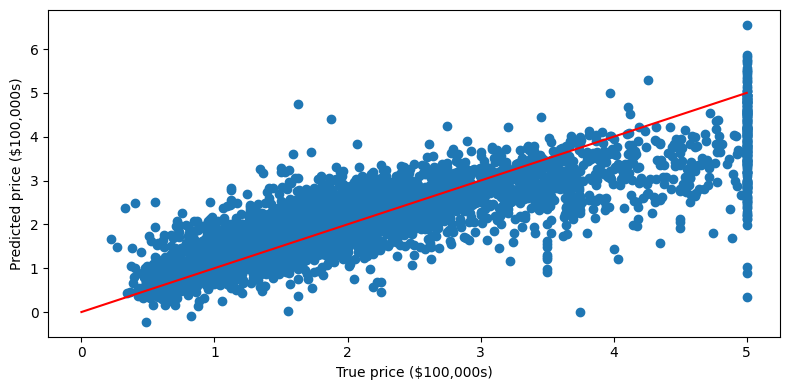

In [73]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 참고문헌

* scikit-learn 사이트: https://scikit-learn.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Sebastian Raschka, Vahid Mirjalili, "Python Machine Learning", Packt
* Giuseppe Bonaccorso, "Machine Learning Algorithm", Packt
* Aurelien Geron, "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems", O'Reilly